# Proyek Analisis Data: Bike Shared Dataset
- Nama : Irwan Syahputra
- Email: irwansyahputra92@gmail.com
- Id Dicoding: irwansyahputra92

## Menentukan Pertanyaan Bisnis

1. Apakah lebih banyak orang yang menyewa sepeda pada hari kerja atau hari libur?
2. Selama musim apa permintaan penyewaan sepeda cenderung meningkat?
3. Bagaimana perkembangan kinerja penyewa sepeda dari tahun 2011 hingga 2022?

## Menyaipkan semua library yang dibutuhkan

Pertama, import library yang dibutuhkan

In [22]:
# Mengimpor library NumPy dan memberinya alias 'np'
import numpy as np

# Mengimpor library Pandas dan memberinya alias 'pd'
import pandas as pd

# Mengimpor library Matplotlib.pyplot dan memberinya alias 'plt'
import matplotlib.pyplot as plt

# Mengimpor library Seaborn dan memberinya alias 'sns'
import seaborn as sns


## Data Wrangling

### Gathering Data

Panggil (load) data day.csv

In [23]:
# Membaca file CSV dari URL yang diberikan dan menyimpannya ke dalam DataFrame day_df
day_df = pd.read_csv("https://raw.githubusercontent.com/inspirasiprogrammer/BikeShareDataset/main/day.csv")

# Menampilkan lima baris pertama dari DataFrame day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load data hour.csv

In [24]:
# Membaca file CSV dari URL menggunakan fungsi read_csv dari pandas
# File CSV ini berisi data terkait penyewaan sepeda pada tingkat per jam
hour_df = pd.read_csv("https://raw.githubusercontent.com/inspirasiprogrammer/BikeShareDataset/main/hour.csv")

# Menampilkan lima baris pertama dari dataframe 'hour_df' menggunakan fungsi head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Periksa apakah terdapat tipe data yang tidak tepat atau nilai null.

In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Periksa apakah terdapat duplikasi data.

In [26]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Periksa apakah ada nilai yang tidak tepat atau null pada tipe data.

In [27]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Periksa apakah terdapat duplikasi data.

In [28]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Ubah tipe data dtype dari kolom dteday dari objek menjadi datetime64 dengan format tanggal.

In [29]:
# Mendefinisikan kolom-kolom yang berisi data tanggal dan waktu
datetime_columns = ["dteday"]

# Melakukan iterasi untuk setiap kolom tanggal dan waktu
for column in datetime_columns:
  
  # Mengubah tipe data kolom tanggal dan waktu menjadi tipe data datetime pada DataFrame day_df
  day_df[column] = pd.to_datetime(day_df[column])
  
  # Mengubah tipe data kolom tanggal dan waktu menjadi tipe data datetime pada DataFrame hour_df
  hour_df[column] = pd.to_datetime(hour_df[column])


Periksa kembali apakah tipe data (dtype) pada kolom dteday sudah berhasil diubah.

In [30]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Periksa juga tipe data dtype dari kolom dteday dalam dataframe hour_df.csv dan pastikan bahwa telah diubah menjadi datetime64 dengan format tanggal.

In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Dari penjelasan dan data dalam file *.csv yang tersedia, kita dapat merumuskan beberapa pertanyaan bisnis sebagai berikut:
1. Evaluasi kinerja usaha penyewaan sepeda.
2. Apakah perkembangan bisnis ini positif dari satu tahun ke tahun berikutnya?
3. Kapan musim dimana permintaan penyewaan sepeda paling tinggi?
4. Apa tujuan utama pelanggan dalam menyewa sepeda?

In [32]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
648,649,2012-10-10,4,1,10,0,3,1,1,0.514167,0.503142,0.630833,0.187821,780,6911,7691
491,492,2012-05-06,2,1,5,0,0,0,2,0.562500,0.546737,0.740000,0.149879,2135,4224,6359
592,593,2012-08-15,3,1,8,0,3,1,1,0.706667,0.654037,0.619583,0.169771,1198,6149,7347
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
275,276,2011-10-03,4,0,10,0,1,1,2,0.384167,0.392046,0.760833,0.083346,330,3240,3570


In [33]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Kelompokkan data sewa sepeda berdasarkan hari kerja untuk menentukan apakah lebih banyak orang yang menyewa sepeda pada hari kerja atau sebaliknya.

In [34]:
day_df.groupby(by="workingday").cnt.sum()

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

### Pertanyaan 2:


Kelompokkan total sewa sepeda berdasarkan musim untuk mengetahui di musim mana permintaan sewa sepeda lebih tinggi.

In [35]:
# Menambahkan kolom 'season' ke dalam dataframe berdasarkan nilai dalam kolom 'weathersit'
day_df["season"] = day_df["weathersit"].apply(lambda x: "Springer" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

# Menerapkan logika kondisional menggunakan fungsi lambda pada kolom 'weathersit' untuk menentukan musim berdasarkan nilai dalam kolom tersebut.
# Jika nilai 'weathersit' adalah 1, maka musim dianggap sebagai "Springer", jika 2, maka "Summer", jika 3, maka "Fall", dan jika tidak ada yang sesuai, musim dianggap sebagai "Winter".

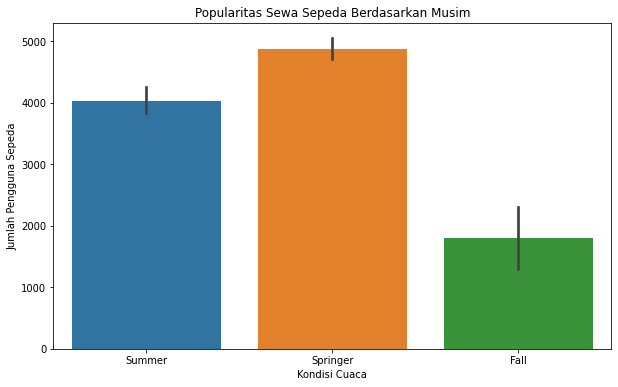

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='cnt',
    data=day_df)

plt.title('Popularitas Sewa Sepeda Berdasarkan Musim')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 3:

Gantilah angka 0 dengan tahun 2011 dan angka 1 dengan tahun 2012.

In [37]:
day_df.yr.replace(day_df.yr.max(), 2012, inplace=True)
day_df.yr.replace(day_df.yr.min(), 2011, inplace=True)

Tambahkan satu kolom atau field baru yang bernama 'periode' untuk menyimpan informasi tahun dan bulan.

In [38]:
# Menduga bahwa kolom 'dteday' berisi data dalam format datetime
day_df['periode'] = day_df['dteday'].apply(lambda x: x.strftime('%Y-%m'))

# Menambahkan kolom 'periode' yang berisi string representasi tahun dan bulan dari tanggal 'dteday'
# Fungsi apply digunakan untuk menerapkan format '%Y-%m' pada setiap nilai dalam kolom 'dteday'

# Menampilkan 5 baris acak dari dataframe
print(day_df.sample(5))

# Output berisi 5 baris acak dari dataframe day_df yang sudah memiliki kolom tambahan 'periode'


     instant     dteday    season    yr  mnth  holiday  weekday  workingday  \
170      171 2011-06-20    Summer  2011     6        0        1           1   
309      310 2011-11-06  Springer  2011    11        0        0           0   
706      707 2012-12-07    Summer  2012    12        0        5           1   
585      586 2012-08-08    Summer  2012     8        0        3           1   
387      388 2012-01-23    Summer  2012     1        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
170           2  0.635000  0.595346  0.746250   0.155475     699        3311   
309           1  0.348333  0.362358  0.734583   0.092054     952        2697   
706           2  0.320833  0.321958  0.764167   0.130600     349        4659   
585           2  0.750000  0.707717  0.672917   0.110700    1263        6271   
387           2  0.218333  0.243058  0.911250   0.110708     145        2287   

      cnt  periode  
170  4010  2011-06  
30

<Axes: >

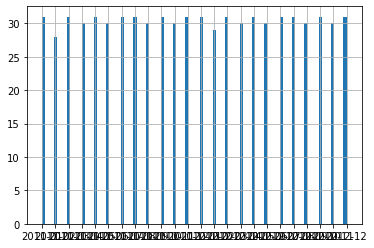

In [39]:
day_df.periode.hist(bins=100)

Analisis kinerja penyewaan per periode dengan pengelompokan data secara terpisah untuk tahun 2011 dan 2012.

In [40]:
day_df.groupby(by="periode").agg({"cnt": "sum"})

,cnt
periode,
2011-01,38189
2011-02,48215
2011-03,64045
2011-04,94870
2011-05,135821
2011-06,143512
2011-07,141341
2011-08,136691
2011-09,127418


Evaluasi kinerja penyewaan untuk tahun 2011 dan 2012.

In [41]:
day_df.groupby(by="yr").agg({"cnt": "sum"})

,cnt
yr,
2011,1243103
2012,2049576


## Conclusion

- Kesimpulan pertanyaan 1: Permintaan penyewaan sepeda lebih tinggi pada hari kerja (workingday) dengan jumlah 2292410.
- Kesimpulan pertanyaan 2: Permintaan penyewaan sepeda lebih tinggi pada musim semi (Springer) dan tidak ada permintaan pada musim dingin (winter).
- Kesimpulan pertanyaan 3: Dari analisis data tahunan, terlihat peningkatan signifikan dalam penyewaan sepeda. Analisis bulanan menunjukkan peningkatan tertinggi terjadi pada kuartal pertama (Januari, Februari, Maret).

In [42]:
day_df.to_csv("main_data.csv", index=False)